# Imports

In [ ]:
from tensorflow import keras

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Dataset

## load data

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

## take a look of the data

**data shape**

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


**data type**

In [ ]:
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


**let's see one data**

It is image data in a numpy array. So to see the image, we will have to use ```matplotlib```'s image visualization method (```pyplot.imshow```).

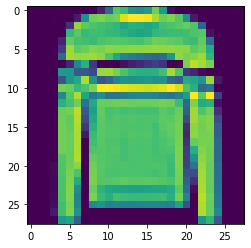

In [ ]:
plt.imshow(x_train[5])

In [ ]:
class_names = np.unique(y_train)
print(class_names)

[0 1 2 3 4 5 6 7 8 9]


# Data Preprocessing

Let's see an example of what the actual data look like.

In [ ]:
x_train[69]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 105, 170, 170,
        170, 158, 146, 143,  86,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 185, 181, 193,
        206, 178, 181, 186, 188,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  33, 195, 153, 160,
        173, 160, 160, 155, 196,  45,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 188, 158, 181,
        196, 178, 180, 160, 188,  85,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 183, 168, 180,
        213, 186, 176, 180, 190, 105,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 120, 171, 155, 165,
        191, 173, 165, 165, 193, 110,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

It's a 28*28 numpy array

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
print(x_train[69])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.4117647  0.6666667
  0.6666667  0.6666667  0.61960787 0.57254905 0.56078434 0.3372549
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.04313726 0.7254902  0.70980394
  0.75686276 0.80784315 0.69803923 0.70980394 0.7294118  0.7372549
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.12941177 0.7647059  0.6
  0.627451   0.6784314  0.627451   0.627451   0.60784316 0.76862746
  0.1764706  0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.3176

# Creating the model

In [ ]:
model = keras.Sequential()                              # model is now a list
model.add(keras.layers.Flatten(input_shape=(28, 28)))   # input layer
model.add(keras.layers.Dense(64, activation='relu'))    # hidden unit, 64 means there will be 64 units in this layer
model.add(keras.layers.Dense(128, activation='tanh'))
model.add(keras.layers.Dense(10, activation='softmax')) # output layer, 10 means there are 10 output classes, so there should be 10 units in the output layer

# we could also do do this in this way
# model = keras.Sequential([keras.layer.Flatten(input_shape=(28, 28)),
#                           keras.layers.Dense(64, activation='relu'),
#                           keras.layers.Dense(10, activation='softmax')
# ])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


# Compile the model

In [ ]:
# model.compile(loss='sparse_categorical_crossentropy',
              # metrics=['accuracy'])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit/Train the model

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2400 - accuracy: 0.9103
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2340 - accuracy: 0.9131
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2261 - accuracy: 0.9141
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2172 - accuracy: 0.9183
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2049 - accuracy: 0.9225
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2070 - accuracy: 0.9230
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1941 - accuracy: 0.9264
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1974 - accuracy: 0.9257
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1864 - accuracy: 0.9283
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1881 - accuracy: 0.9293

# Evaluate the model

In [ ]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8875
[0.33374345302581787, 0.887499988079071]


# Make predictions

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[69]

array([4.9517079e-09, 6.9657500e-12, 6.3508560e-10, 9.5509316e-09,
       2.5723004e-09, 1.0245588e-10, 3.6653997e-10, 1.1935539e-07,
       9.9999988e-01, 2.3315058e-10], dtype=float32)

In [ ]:
np.argmax(predictions[69])

8

and 8 means bag!

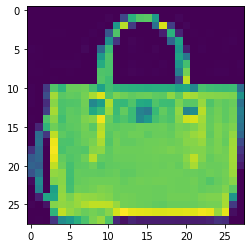

In [ ]:
plt.imshow(x_test[69])